<a href="https://colab.research.google.com/github/nickbel7/ntua-artificial-intelligence/blob/main/CODE-03/AI_CODE_03_lab_assignment_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Μέλη Ομάδας:
Ον/μο1: Νικόλας Μπέλλος <br>
Αρ. Μητρώου 1: el18183

Ον/μο2:  
Αρ. Μητρώου 2:  

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

# 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong), και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$



In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random
import math

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      
      ##################
      ## Your code below
      data_size = len(y_true) #number of data
      same_res = 0 
      for i in range (data_size): #number of correct predictions
        if (y_true[i] == y_pred[i]):
          same_res += 1

      acc = same_res / data_size  #accuracy ratio
      ## Your code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [ ]:
y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.75
recall: 0.75
f1: 0.75
accuracy: 0.75
Confusion matrix: 
[[3 1]
 [1 3]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


In [ ]:
# Σύνδεση του Google Colab με το Google Drive

from google.colab import drive
drive.mount('/drive')

path="/drive/My Drive/ECE-COURSES/7-Τεχνητή Νοημοσύνη/3-Code/"

Mounted at /drive


Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm 

In [ ]:
# read data in the form of pandas DataFrame
data = pd.read_csv(path + "music_df_processed.csv")

# print the first 5 values of the DataFrame using .head() command
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,13531.000000,13531.000000,13531.000000,13531.000000,1.353100e+04,13531.000000,13531.000000,13531.000000,13531.000000,13531.000000,13531.000000,13531.000000
mean,55885.281502,52.854482,0.161863,0.618556,2.176361e+05,0.691926,0.137073,0.197629,-6.990060,0.112838,123.052186,0.456102
std,20714.333985,13.337100,0.218414,0.154893,1.169185e+05,0.186321,0.277412,0.159705,3.190236,0.112915,28.347021,0.235353
min,20005.000000,0.000000,0.000001,0.064500,-1.000000e+00,0.002590,0.000000,0.017300,-37.124000,0.022400,35.551000,0.020500
25%,37978.500000,44.000000,0.008925,0.516000,1.819605e+05,0.561000,0.000000,0.097600,-8.664000,0.038200,99.998000,0.271000
50%,55730.000000,55.000000,0.059300,0.625000,2.201990e+05,0.708000,0.000083,0.130000,-6.426000,0.059800,123.475000,0.443000
75%,73834.000000,62.000000,0.233000,0.731000,2.634285e+05,0.844000,0.061350,0.257000,-4.791500,0.148000,142.636000,0.630500
max,91759.000000,99.000000,0.994000,0.977000,4.497994e+06,0.999000,0.986000,0.991000,1.585000,0.922000,220.041000,0.992000


## Επιλογή χαρακτηριστικών x και στόχων y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.

In [ ]:
# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rap", "Rock"]

# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.
data = data[data[output].isin(genres)]

# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}

# εδώ πρέπει να διαχωρίσετε τα δεδομένα σε train (70% των δεδομένων)/test set (30% των δεδομένων)
# ονομάστε τις μεταβλητές ως εξής:
# τα χαρακτηριστικά του train set: x_train
# τις κατηγορίες-στόχους του train set: y_train
# τα χαρακτηριστικά του test set: x_test
# τις κατηγορίες-στόχους του test set: y_test
x_test, y_test, x_train, y_train = [], [], [], []
##################
## Your code below

### Data analysis ###
data_size = len(data) # First we see how much data we have

# We need to know how many songs in each genre (in order to seperate them equally)
genre_data_size = {genre: data[output].tolist().count(genre) for genre in genres}
# print(genre_data_size)

# And then create ranges for the songs that will go to the train set (70% of each genre)
range_genre_1 = (1, math.floor(genre_data_size['Electronic'] * 0.7))
# print(range_genre_1)
range_genre_2 = (1, math.floor(genre_data_size['Rap'] * 0.7))
range_genre_2 = tuple(a + genre_data_size['Electronic'] for a in range_genre_2)
# print(range_genre_2)
range_genre_3 = (1, math.floor(genre_data_size['Rock'] * 0.7))
range_genre_3 = tuple(a + genre_data_size['Electronic'] + genre_data_size['Rap'] for a in range_genre_3)
# print(range_genre_3)

ranges = [range_genre_1, range_genre_2, range_genre_3]

index = 0 # real index for filtered data
for i, song in data.iterrows(): # for every song
  index += 1
  input_x = [song[input] for input in inputs]  # take the attributes that we want
  output_y = genres_to_id[song[output]] # take the genre in which the song belongs
  if any(lower <= index <= upper for (lower, upper) in ranges): # place it in the appropriate set
    x_train.append(input_x)
    y_train.append(output_y)
  else:
    x_test.append(input_x)
    y_test.append(output_y)

## Your code above
##################

## Μορφή των δεδομένων  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.

In [ ]:
# Shape of x_test, y_test, x_train, y_train

##################
## Your code below

print('Shape for x_test : ' + str(np.shape(x_test)))
print('Shape for y_test : ' + str(np.shape(y_test)))
print('Shape for x_train : ' + str(np.shape(x_train)))
print('Shape for y_train : ' + str(np.shape(y_train)))

## Your code above
##################

Shape for x_test : (4061, 6)
Shape for y_test : (4061,)
Shape for x_train : (9470, 6)
Shape for y_train : (9470,)


Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set. 

In [ ]:
# Range of x_train, x_test columns

##################
## Your code below

# Attributes for train set
print('---- TRAIN SET ----')
for index, input in enumerate(inputs):
  min_value = min([i[index] for i in x_train])
  max_value = max([i[index] for i in x_train])
  print(input + ' | MIN : ' + str(round(min_value,4)) + ' MAX : ' + str(round(max_value,4)))

# Attributes for test set
print('\n---- TEST SET ----')
for index, input in enumerate(inputs):
  min_value = min([i[index] for i in x_test])
  max_value = max([i[index] for i in x_test])
  print(input + ' | MIN : ' + str(round(min_value,4)) + ' MAX : ' + str(round(max_value,4)))

## Your code above
##################

---- TRAIN SET ----
acousticness | MIN : 0.0 MAX : 0.994
danceability | MIN : 0.0645 MAX : 0.977
energy | MIN : 0.0026 MAX : 0.998
instrumentalness | MIN : 0.0 MAX : 0.986
liveness | MIN : 0.0173 MAX : 0.991
speechiness | MIN : 0.0224 MAX : 0.883

---- TEST SET ----
acousticness | MIN : 0.0 MAX : 0.987
danceability | MIN : 0.105 MAX : 0.969
energy | MIN : 0.0457 MAX : 0.999
instrumentalness | MIN : 0.0 MAX : 0.98
liveness | MIN : 0.0208 MAX : 0.984
speechiness | MIN : 0.0234 MAX : 0.922


Από την παραπάνω ανάλυση προκύπτουν κάποια ερωτήματα σημαντικά για τα επόμενα βήματα:
- Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;
<br><b>Απάντηση</b> : Ναι, φαίνεται να έχουν περίπου το ίδιο εύρος, άρα έχει γίνει ένας καλός διαχωρισμός των δεδομένων.

- Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας; 
<br><b>Απάντηση</b> : Ναι, στη περίπτωστή μας όλα τα χαρακτηριστικά έχουν πραγματικές τιμές που ανήκουν στο [0,1]

# 2o Μέρος: Υλοποίηση KNN
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [ ]:
from numpy import linalg
from scipy.spatial import distance
from collections import Counter

class KNN:
    def __init__(self, x, y, k, distance = "euclidean"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):
      if self.distance=='euclidean':
        ##################
        ## Your code below

        dist = distance.euclidean(row1, row2)
        # Alternative
        # dist = np.linalg.norm(np.array(row1)-np.array(row2))
        # Typical way :
        # diff_sum = 0.0
        # for i in range(len(row1)):
        #   diff_sum += (row1[i] - row2[i])**2
        # dist = sqrt(distance)

        ## Your code above
        ##################
      elif self.distance=='cosine':
        ##################
        ## Your code below

        dist = distance.cosine(row1, row2)
        # Reference :
        # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html

        ## Your code above
        ##################

      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = list()
      x = self.x
      k = self.k
      
      ##################
      ## Your code below - populate the distances list

      for item in x:
        distances.append(self.get_distance(item, row))

      ## Your code above
      ##################

      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    ## Given a DataFrame row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
      y = self.y
      nn_labels = [y[i] for i in self.get_knn(row)]
      
      ##################
      ## Your code below
      
      c = Counter(nn_labels)
      prediction = c.most_common(1)[0][0] # has better results on same data
      # prediction = multimode(nn_labels)
      # prediction = max(set(nn_labels), key=nn_labels.count)

      ## Your code above
      ###################
      return prediction


knn = KNN(x_train, y_train, k=5, distance='euclidean')

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Αξιολόγηση του KNN

In [ ]:
# Shuffle the test data
test_data = list(zip(x_test, y_test))
random.shuffle(test_data)
x_test, y_test = zip(*test_data)
x_test = list(x_test)
y_test = list(y_test)

In [ ]:
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

In [ ]:
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.7468136152346679
recall: 0.7606653404067197
f1: 0.7389432925868394
accuracy: 0.74
Confusion matrix: 
[[21 10  8]
 [ 0 27  2]
 [ 5  1 26]]


## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 10
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.7419389978213508
recall: 0.7547708517536104
f1: 0.7412587412587412
accuracy: 0.74
Confusion matrix: 
[[23 10  6]
 [ 2 25  2]
 [ 5  1 26]]


## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

Για τους χρόνους εκτέλεσης για k = 5 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]
eval = Evaluate(y_test[:100], preds)
eval.get_evaluation_report()

precision: 0.7438005957275734
recall: 0.7389978213507625
f1: 0.7388426831919982
accuracy: 0.74
Confusion matrix: 
[[24  5  5]
 [ 1 28  7]
 [ 4  4 22]]
CPU times: user 15.1 s, sys: 38.4 ms, total: 15.1 s
Wall time: 15.2 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
eval = Evaluate(y_test[:100], preds)
eval.get_evaluation_report()

precision: 0.7416666666666667
recall: 0.7374037343795408
f1: 0.7388312375091858
accuracy: 0.74
Confusion matrix: 
[[22  4  5]
 [ 3 23  6]
 [ 5  3 29]]
CPU times: user 38.8 s, sys: 71.8 ms, total: 38.9 s
Wall time: 38.9 s


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])
eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.6967099567099568
recall: 0.6901501402408843
f1: 0.6875743348982786
accuracy: 0.69
Confusion matrix: 
[[24 10  4]
 [ 3 27  3]
 [ 6  5 18]]
CPU times: user 35.9 ms, sys: 0 ns, total: 35.9 ms
Wall time: 36.1 ms


Για τους χρόνους εκτέλεσης για k = 50 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]
eval = Evaluate(y_test[:100], preds)
eval.get_evaluation_report()

precision: 0.756831584207896
recall: 0.7425257919209532
f1: 0.7428380187416334
accuracy: 0.75
Confusion matrix: 
[[23  3  5]
 [ 5 19  8]
 [ 1  3 33]]
CPU times: user 15.4 s, sys: 36.4 ms, total: 15.4 s
Wall time: 15.4 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]
eval = Evaluate(y_test[:100], preds)
eval.get_evaluation_report()

precision: 0.7875681883433822
recall: 0.775183449578611
f1: 0.77834631071561
accuracy: 0.78
Confusion matrix: 
[[23  3  5]
 [ 3 23  6]
 [ 1  4 32]]
CPU times: user 39 s, sys: 80.1 ms, total: 39.1 s
Wall time: 39.1 s


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])
eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.756831584207896
recall: 0.7425257919209532
f1: 0.7428380187416334
accuracy: 0.75
Confusion matrix: 
[[23  3  5]
 [ 5 19  8]
 [ 1  3 33]]
CPU times: user 41.5 ms, sys: 0 ns, total: 41.5 ms
Wall time: 44.1 ms


## Σχολιασμός

### Παραδοχές
---
Αν και ο έτοιμος ταξινομητής είναι σίγουρα πιο γρήγορος, η απόδοσή του δεν υπερτερεί από τους δύο ταξινομητές που έφτιαξα. Παρατήρησα επίσης, ότι όταν τα δεδομένα είναι ανακατεμένα η απόδοση των ταξινομητών είναι καλύτερη σε σχέση με το αν όλα τα τραγούδια που δοκιμάζαμε ανήκαν στο ίδιο είδος. 

### Επίδοση
---
Η επίδοση φαίνεται να είναι παροόμοια και στις τρείς περιπτώσεις και ο δείκτης accuracy είναι περιπου στο 0.65 - 0.75. Δηλαδή είτε στη δική μου λύση είτε στην έτοιμη λύση ο ταξινομητής ταξινομεί σωστά περίπου 3 στα 4 τραγούδια.

### Χρόνοι εκτέλεσης
---
Για το classification των 100 πρώτων δεδομένων έχουμε ότι: 
<br>Οι χρόνοι εκτέλεσης της έτοιμης λύσης είναι της τάξης των 40ms, οι οποίοι είναι και οι πιο γρήγοροι όπως ήταν αναμενόμενο. Για τις δικές μου λύσεις οι χρόνοι εκτέλεσεις για το euclidean distance είναι της τάξης των 16s, ενώ για το cosine distance της τάξης των 38s (μία αρκετά μεγάλη σχετική διαφορά).  

### Επίδραση παραμέτρου Κ
---
Η επίδραση της παραμέτρου Κ όσον αφορά το χρόνο έχει μία αρκετά μικρή, αμελητέα σχεδόν επίδραση, το οποίο είναι λογικό γιατί τη μεγαλύτερη χρονική πολυπλοκότητα ταξινομητή την έχει το sorting και στο τέλος απλά επιλέγουμε γραμμικά τα πρώτα K στοιχεία. Όσον αφορά τα αποτελέσματα παρατηρούμε μία μικρή βελτίωση (αλλά όχι απαραίτητα σε όλους τους ταξινομητές) στην επίδοση του ταξινομητή όταν αυξάνουμε το Κ (της τάξης του 0.02 στο accuracy).  

# 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [ ]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακρίτη σε σε διαστήματα 

def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [ ]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = np.array(y)
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres))) # pcX[number of bits in each song (5*6), 3 genres]
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y: self.pC[label] += 1
        self.pC = self.pC / self.y.shape[0]

        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below
        
        for index, song in enumerate(self.x): # take each song
          for i, attr in enumerate(song): # take all attributes in each song (attr -> 0 or 1)
            self.pxC[i][self.y[index]] += attr
          
        self.pxC = self.pxC / self.x.shape[0]

        ## Your code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),)) # initial probability 1 for all genres
        xsize = self.x.shape[-1]  # number of bits that represent the characteristics in each song
        for i in range(len(genres)):
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below

          for index, feature in enumerate(x):  # all the positions that x has a feature bit = 1
            if feature:
              pcX[i] *= self.pxC[index][i]

          pcX[i] *= self.pC[i]  # multiply with probability of class i in [0,2]

          ## Your code above
          ##################
        return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds)
eval.get_evaluation_report()

precision: 0.7041924622569784
recall: 0.7467866066966516
f1: 0.7092953023987508
accuracy: 0.7
Confusion matrix: 
[[24  8 14]
 [ 1 24  0]
 [ 6  1 22]]


## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.6758551571690833
recall: 0.669282346006484
f1: 0.6595435520808656
accuracy: 0.66
Confusion matrix: 
[[23  7  9]
 [ 3 20  9]
 [ 2  4 23]]


## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

In [ ]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 330 ms, sys: 2.24 ms, total: 333 ms
Wall time: 332 ms


In [ ]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

CPU times: user 31.7 ms, sys: 11 µs, total: 31.7 ms
Wall time: 33.1 ms


## Σχολιασμός

### Σχόλια - Παρατηρήσεις
---
ο Αλγόριθμος φαίνεται να είναι αρκτετά γρήγορος, κυρίως λόγω του precomputing που γίνεται στη μέθοδο compute_probabilities.

### Επίδοση
---
Η επίδοση όσον αφορά το accuracy κυμένεται και πάλι γύρω στο 0.65 - 0.75, όπως και στη προηγούμενη περίπτωση, επομένως το μοντέλο με το συγκεκριμένο training data set ταξινομεί επιτυχώς περίπου 3/4 τραγούδια (το οποίο είναι ικανοποιητικό δεδομένου του μικρού dataset, αλλά όχι και όσο ακριβές θα θέλαμε). Η ακρίβεια παρατηρείται να είναι ίδια σε ποσοστό τόσο στο δικό μας μοντέλο όσο και σε αυτό της βιβλιοθήκης sklearn.

### Χρόνος εκτέλεσης
---
Για το classification των 100 πρώτων δεδομένων έχουμε ότι: 
<br>Λόγω του precomputing που γίνεται μία φορά για όλο training data set οι χρόνοι εκτέλεσης είναι σχετικά μικρότερη με μεγάλη διαφορά σε σχέση με το KNN. Για το δικό μας μοντέλο ο χρόνος εκτέλεσης ήταν περίπου 330ms ενώ για το έτοιμο μοντέλο της βιβλιοθήκης ήταν περίπου 22ms (10 φορές μικρότερος).
### Επίδραση bining
---
Η επίδραση του bining δηλαδή ο διαμοιρασμός των χαρακτηριστικών σε επιμέρους μικρότερες κατηγορίες μας οδηγεί σε πιο ακριβή αποτελέσματα. Αυτό σημαίνει ότι όσο μεγαλύτερος είναι αυτός ο διαχωρισμός (δηλαδή όσο μεγαλύτερο το Ν) τόσο πιο ακριβή θα είναι οι προβλέψεις. Στη πράξη όταν πάμε να αυξήσουμε το Ν η απόδοση του ταξινομητή βελτιώνεται και ξεπερνά αυτή του έτοιμου μοντέλου, αν και η αύξηση είναι μικρή (της τάξης του 0.01 για διπλασιαμό του Ν).

# 4ο Μέρος: Multi-Layer Perceptron 

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου. 

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [ ]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        #===== My Notes =====
        # A Layer to be described needs :
        # 1. An amount of perceptrons
        # 2. A list with the activation functions of each perceptron
        # 3. A list with the constant β for each perceptron
        # 4. A list with the "correct" values of each perceptron
        # 5. A list of lists for the weights of each perceptron
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]  # number of perceptrons
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [ ]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = np.array(input) > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [ ]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units] -> [πλήθος διανυσμάτων x (train_set), πλήθος χαρακτηριστικών σε κάθε input]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot

        output = []
        for item in input:
          output.append(np.dot(item, self.weights) + self.biases)
        
        # Alternative
        # output = [np.dot(item, self.weights) + self.biases for item in input]
        
        ## Your code above
        ##################
        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        input = np.array(input)
        grad_weights = np.dot(input.T, grad_output) # w[k+1] = w[k] + ...
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [ ]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits = np.array(logits)
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    logits = np.array(logits)
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [ ]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            
            input = l.forward(input)
            activations.append(input)

            ## Your code above
            ##################        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]  # takes only the output layer for each input
        return np.array(logits).argmax(axis = -1) # (list) axis=-1 means it takes for each input the position of its max element (aka the class)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X) # (list of lists) for each layer -> 1 list with activations for each perceptron
        layer_inputs = [X]+layer_activations  # (list of lists) input layer + activations for rest of layers
        logits = layer_activations[-1]  # (list) result of last layer (aka network output -> probability distribution)

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

Epoch 0
Train accuracy: 0.28922914466737065
Val accuracy: 0.29450874168923913


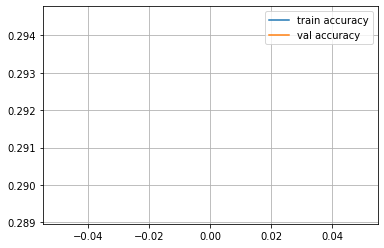

Epoch 1
Train accuracy: 0.3261879619852165
Val accuracy: 0.32849051957645903


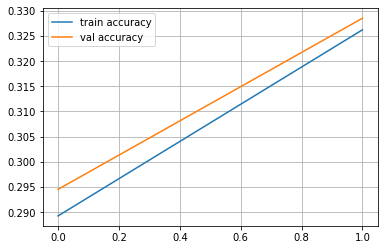

Epoch 2
Train accuracy: 0.331467793030623
Val accuracy: 0.33144545678404336


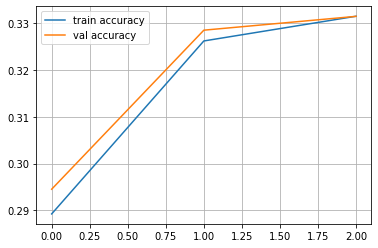

Epoch 3
Train accuracy: 0.3324181626187962
Val accuracy: 0.33169170155134203


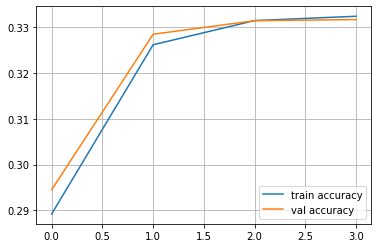

Epoch 4
Train accuracy: 0.3334741288278775
Val accuracy: 0.33169170155134203


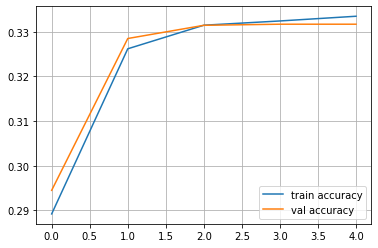

Epoch 5
Train accuracy: 0.3335797254487856
Val accuracy: 0.3331691701551342


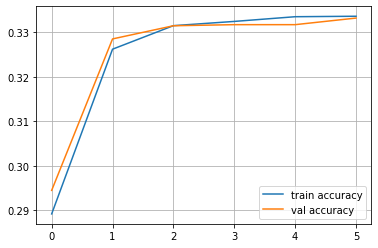

Epoch 6
Train accuracy: 0.3333685322069694
Val accuracy: 0.3331691701551342


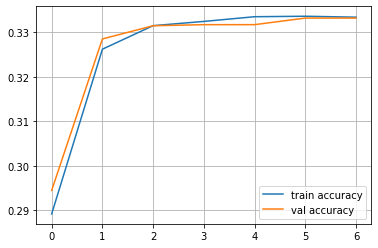

Epoch 7
Train accuracy: 0.3331573389651531
Val accuracy: 0.3329229253878355


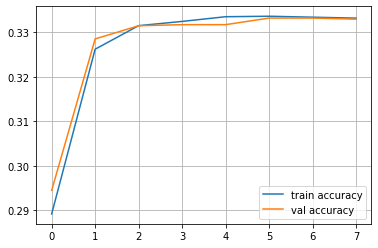

Epoch 8
Train accuracy: 0.33326293558606124
Val accuracy: 0.3334154149224329


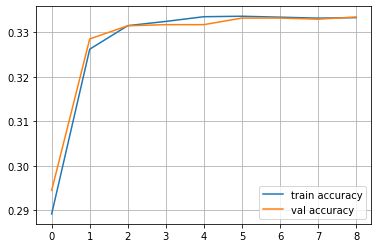

Epoch 9
Train accuracy: 0.3335797254487856
Val accuracy: 0.3336616596897316


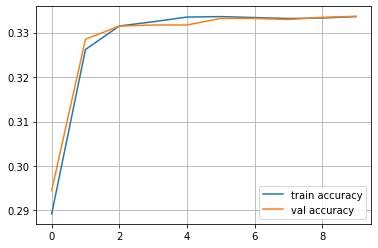

Epoch 10
Train accuracy: 0.33463569165786694
Val accuracy: 0.3339079044570303


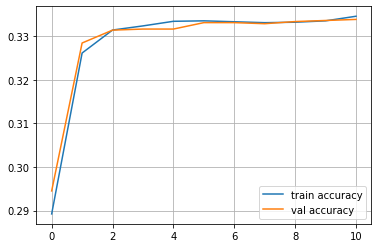

Epoch 11
Train accuracy: 0.33600844772967264
Val accuracy: 0.33661659689731593


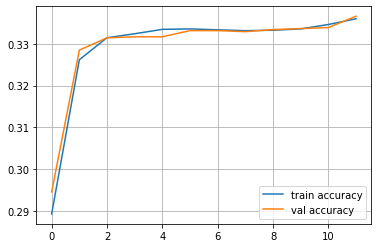

Epoch 12
Train accuracy: 0.33875395987328405
Val accuracy: 0.3380940655011081


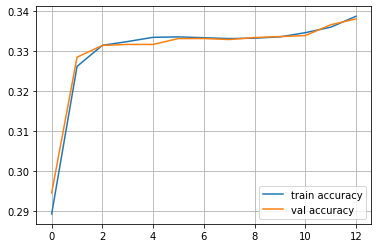

Epoch 13
Train accuracy: 0.34181626187961983
Val accuracy: 0.34203398177788724


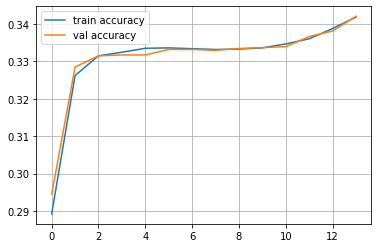

Epoch 14
Train accuracy: 0.34720168954593456
Val accuracy: 0.3467126323565624


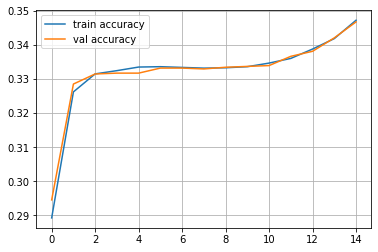

Epoch 15
Train accuracy: 0.3521647307286167
Val accuracy: 0.3531149963063285


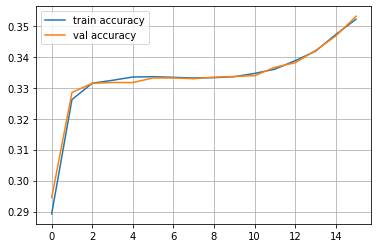

Epoch 16
Train accuracy: 0.3624076029567054
Val accuracy: 0.3634572765328737


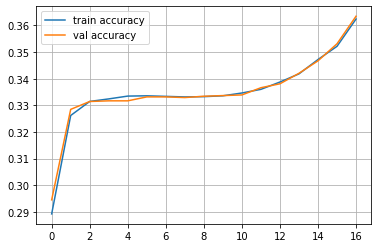

Epoch 17
Train accuracy: 0.3761351636747624
Val accuracy: 0.37921694163999015


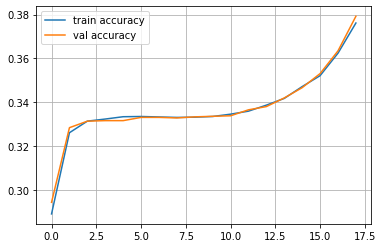

Epoch 18
Train accuracy: 0.393558606124604
Val accuracy: 0.40014774686037924


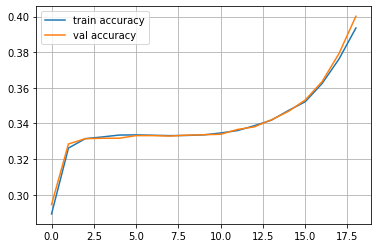

Epoch 19
Train accuracy: 0.4147835269271383
Val accuracy: 0.42378724452105393


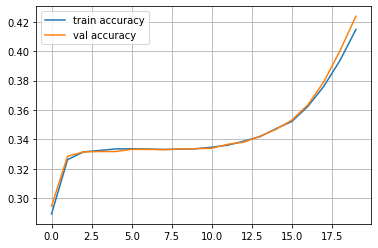

Epoch 20
Train accuracy: 0.43294614572333684
Val accuracy: 0.4432405811376508


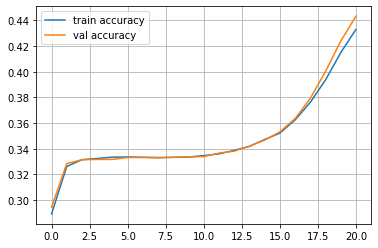

Epoch 21
Train accuracy: 0.44604012671594506
Val accuracy: 0.45604530903718293


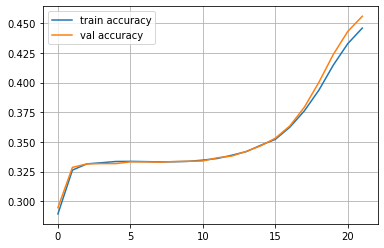

Epoch 22
Train accuracy: 0.4504751847940866
Val accuracy: 0.4617089386850529


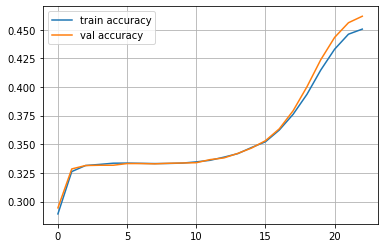

Epoch 23
Train accuracy: 0.45364308342133053
Val accuracy: 0.4671263235656242


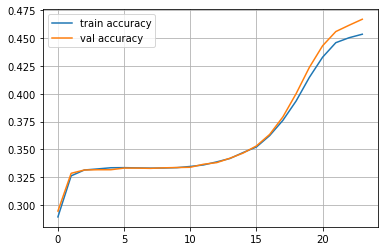

Epoch 24
Train accuracy: 0.45638859556494193
Val accuracy: 0.47008126077320855


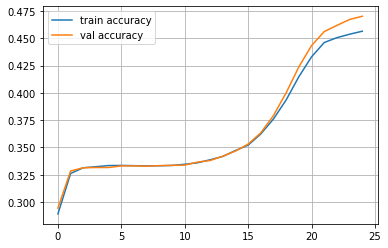

Epoch 25
Train accuracy: 0.4587117212249208
Val accuracy: 0.47254370844619553


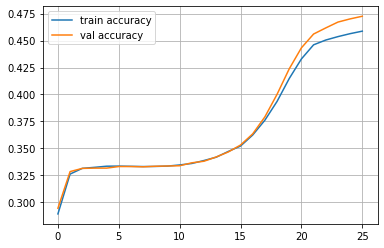

Epoch 26
Train accuracy: 0.46050686378035904
Val accuracy: 0.4735286875153903


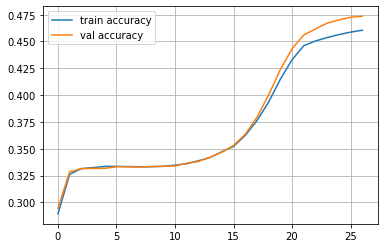

Epoch 27
Train accuracy: 0.46261879619852164
Val accuracy: 0.47599113518837727


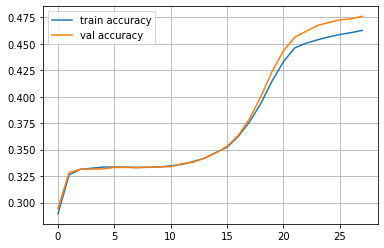

Epoch 28
Train accuracy: 0.4650475184794087
Val accuracy: 0.4789460723959616


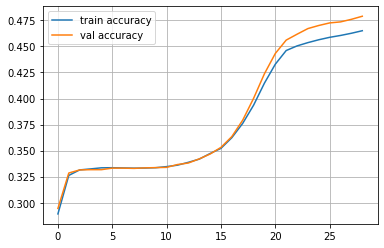

Epoch 29
Train accuracy: 0.4666314677930306
Val accuracy: 0.48066978576705244


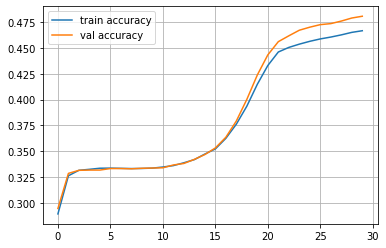

Epoch 30
Train accuracy: 0.4686378035902851
Val accuracy: 0.4814085200689485


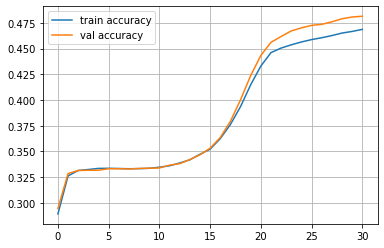

Epoch 31
Train accuracy: 0.4699049630411827
Val accuracy: 0.4821472543708446


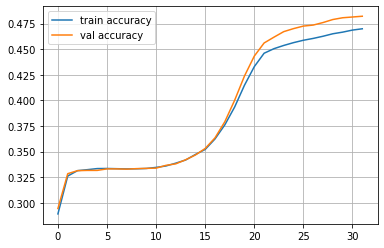

Epoch 32
Train accuracy: 0.47117212249208024
Val accuracy: 0.48239349913814333


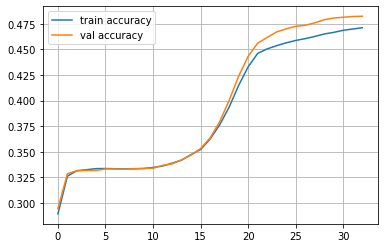

Epoch 33
Train accuracy: 0.4727560718057022
Val accuracy: 0.4838709677419355


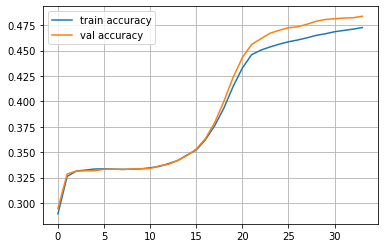

Epoch 34
Train accuracy: 0.4744456177402323
Val accuracy: 0.48608717064762375


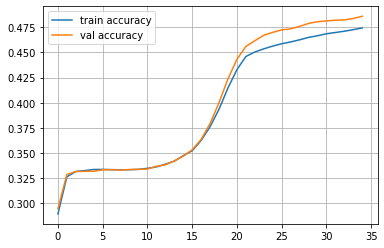

Epoch 35
Train accuracy: 0.4756071805702218
Val accuracy: 0.4878108840187146


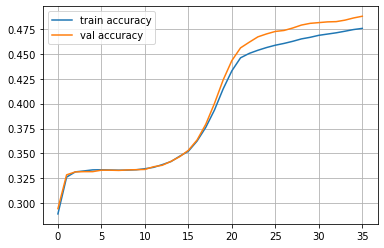

Epoch 36
Train accuracy: 0.47624076029567053
Val accuracy: 0.48854961832061067


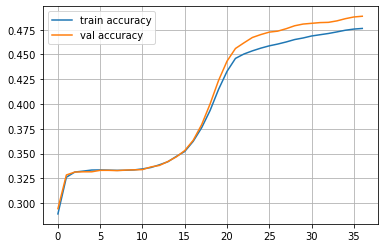

Epoch 37
Train accuracy: 0.47666314677930305
Val accuracy: 0.49051957645900024


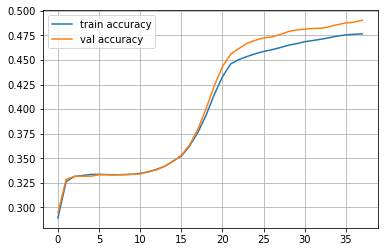

Epoch 38
Train accuracy: 0.47845828933474127
Val accuracy: 0.4924895345973898


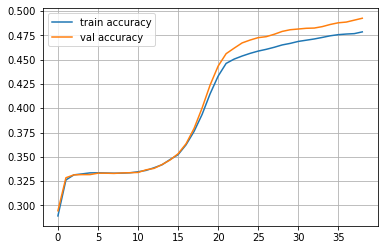

Epoch 39
Train accuracy: 0.4791974656810982
Val accuracy: 0.4927357793646885


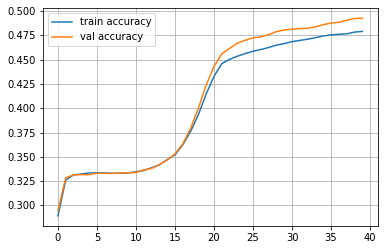

Epoch 40
Train accuracy: 0.4795142555438226
Val accuracy: 0.4929820241319872


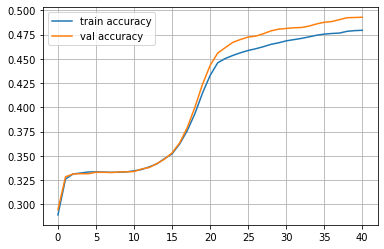

Epoch 41
Train accuracy: 0.4805702217529039
Val accuracy: 0.4929820241319872


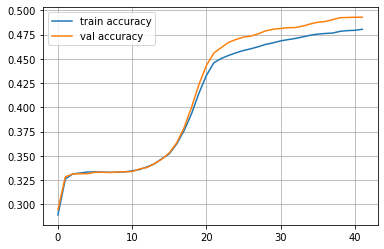

Epoch 42
Train accuracy: 0.4818373812038015
Val accuracy: 0.49421324796848065


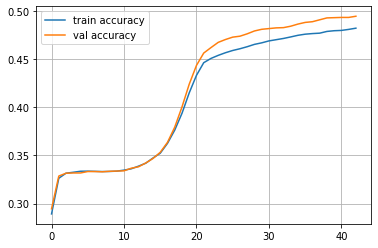

Epoch 43
Train accuracy: 0.4834213305174234
Val accuracy: 0.49519822703767546


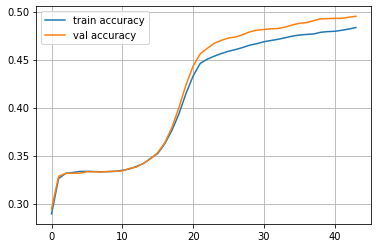

Epoch 44
Train accuracy: 0.4832101372756072
Val accuracy: 0.4956907165722728


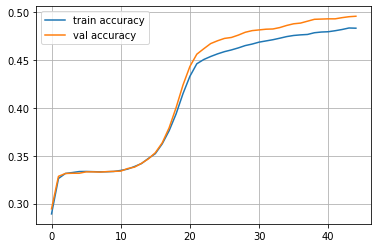

Epoch 45
Train accuracy: 0.4839493136219641
Val accuracy: 0.4969219404087663


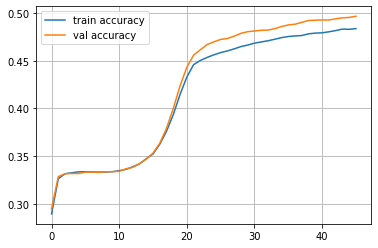

Epoch 46
Train accuracy: 0.48447729672650475
Val accuracy: 0.4979069194779611


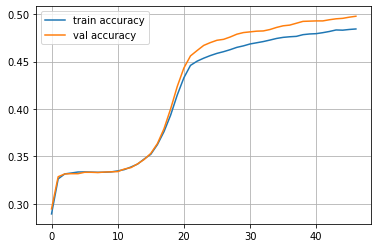

Epoch 47
Train accuracy: 0.4853220696937698
Val accuracy: 0.4986456537798572


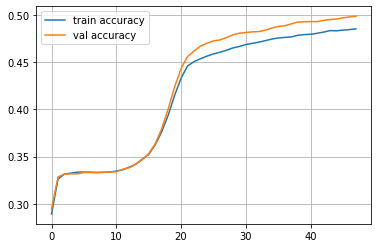

Epoch 48
Train accuracy: 0.4863780359028511
Val accuracy: 0.4993843880817533


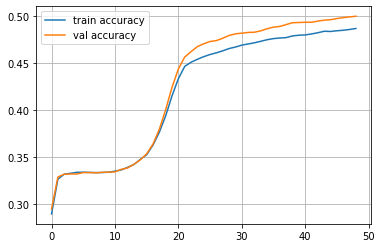

Epoch 49
Train accuracy: 0.4873284054910243
Val accuracy: 0.5011081014528441


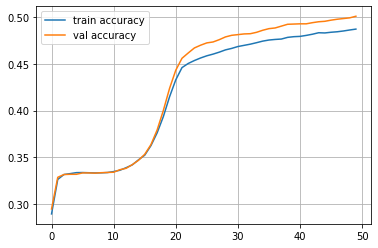

Epoch 50
Train accuracy: 0.4882787750791975
Val accuracy: 0.5023393252893376


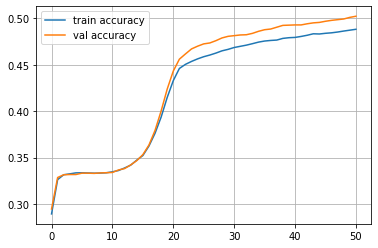

Epoch 51
Train accuracy: 0.4891235480464625
Val accuracy: 0.5030780595912336


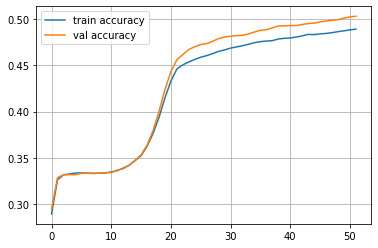

Epoch 52
Train accuracy: 0.4900739176346357
Val accuracy: 0.5043092834277272


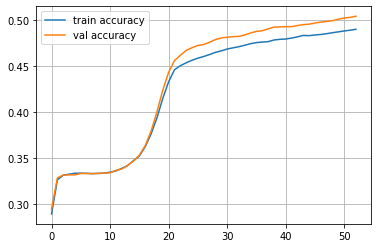

Epoch 53
Train accuracy: 0.49070749736008445
Val accuracy: 0.5043092834277272


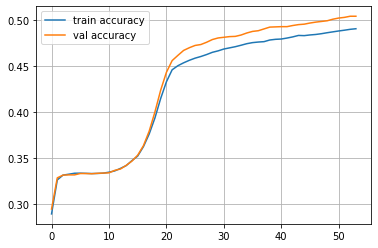

Epoch 54
Train accuracy: 0.4925026399155227
Val accuracy: 0.5050480177296233


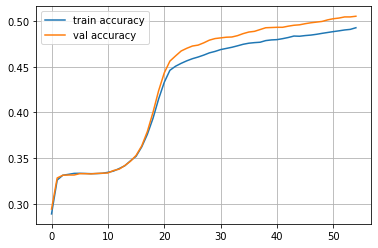

Epoch 55
Train accuracy: 0.49292502639915525
Val accuracy: 0.5055405072642206


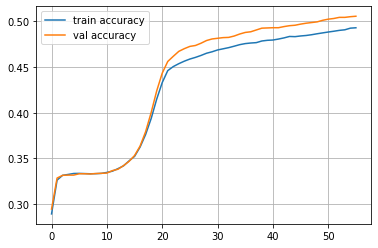

Epoch 56
Train accuracy: 0.4939809926082365
Val accuracy: 0.5062792415661167


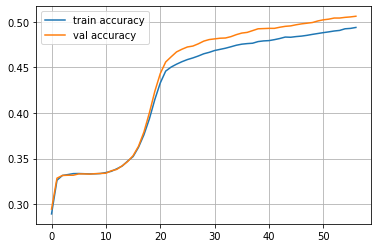

Epoch 57
Train accuracy: 0.4945089757127772
Val accuracy: 0.5070179758680128


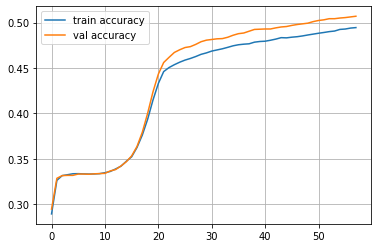

Epoch 58
Train accuracy: 0.49545934530095037
Val accuracy: 0.5080029549372076


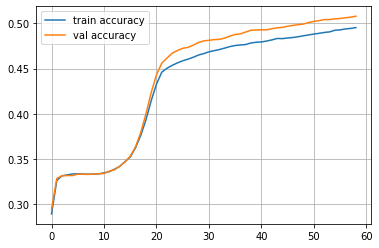

Epoch 59
Train accuracy: 0.4965153115100317
Val accuracy: 0.5087416892391037


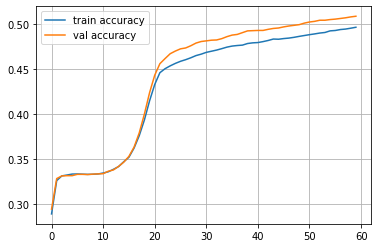

Epoch 60
Train accuracy: 0.49736008447729674
Val accuracy: 0.5089879340064024


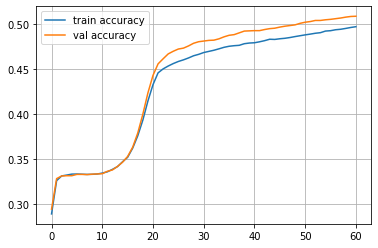

Epoch 61
Train accuracy: 0.4983104540654699
Val accuracy: 0.5102191578428958


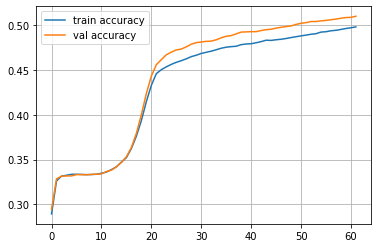

Epoch 62
Train accuracy: 0.4988384371700106
Val accuracy: 0.5104654026101946


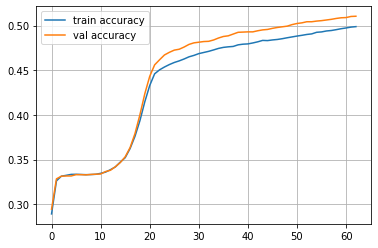

Epoch 63
Train accuracy: 0.49915522703273496
Val accuracy: 0.5114503816793893


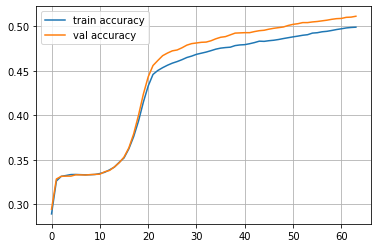

Epoch 64
Train accuracy: 0.4997888067581837
Val accuracy: 0.5119428712139867


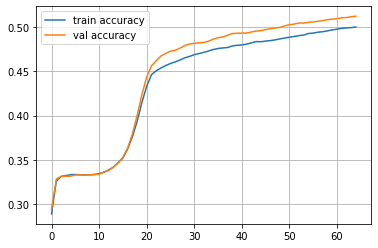

Epoch 65
Train accuracy: 0.5001055966209081
Val accuracy: 0.5129278502831814


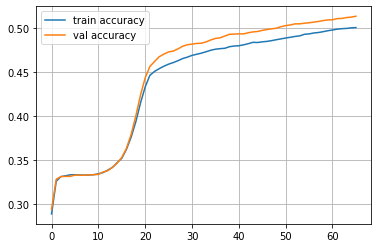

Epoch 66
Train accuracy: 0.5006335797254488
Val accuracy: 0.5129278502831814


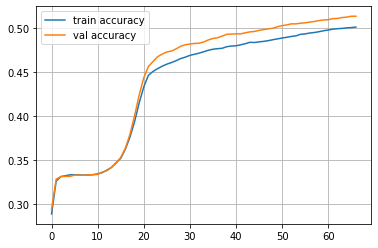

Epoch 67
Train accuracy: 0.5015839493136219
Val accuracy: 0.5136665845850775


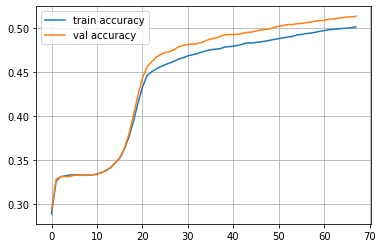

Epoch 68
Train accuracy: 0.5020063357972545
Val accuracy: 0.5144053188869736


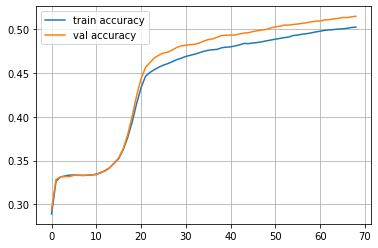

Epoch 69
Train accuracy: 0.5029567053854277
Val accuracy: 0.5151440531888697


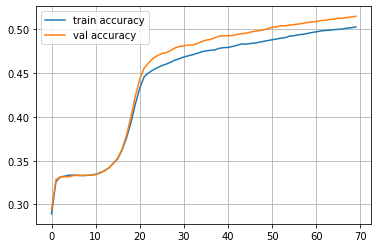

Epoch 70
Train accuracy: 0.5039070749736009
Val accuracy: 0.5158827874907658


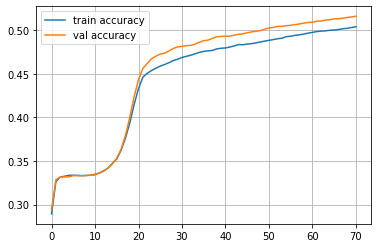

Epoch 71
Train accuracy: 0.5044350580781415
Val accuracy: 0.5168677665599606


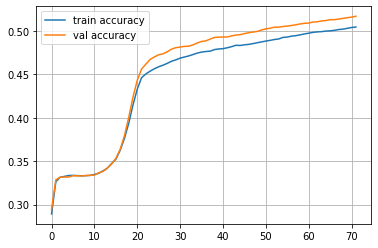

Epoch 72
Train accuracy: 0.5047518479408659
Val accuracy: 0.5176065008618567


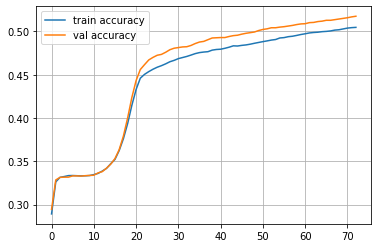

Epoch 73
Train accuracy: 0.5057022175290391
Val accuracy: 0.5188377246983502


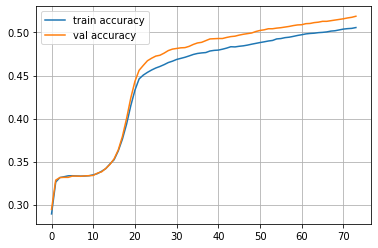

Epoch 74
Train accuracy: 0.5066525871172123
Val accuracy: 0.5193302142329476


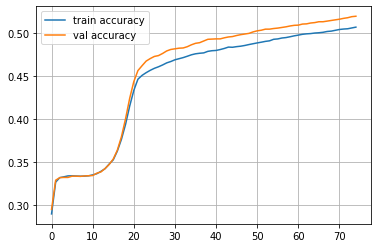

Epoch 75
Train accuracy: 0.5071805702217529
Val accuracy: 0.5198227037675449


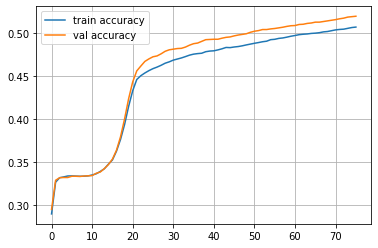

Epoch 76
Train accuracy: 0.5077085533262936
Val accuracy: 0.5215464171386358


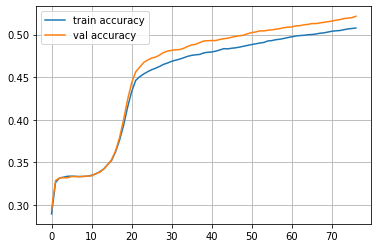

Epoch 77
Train accuracy: 0.5085533262935586
Val accuracy: 0.5225313962078306


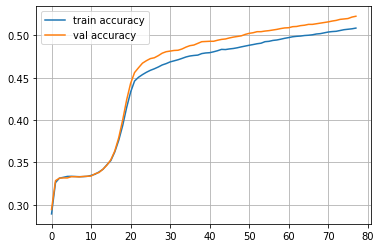

Epoch 78
Train accuracy: 0.5089757127771911
Val accuracy: 0.5232701305097267


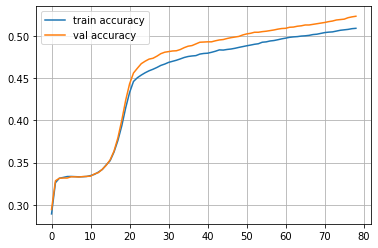

Epoch 79
Train accuracy: 0.509714889123548
Val accuracy: 0.5240088648116228


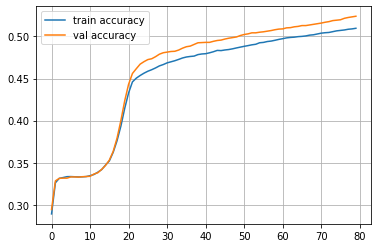

Epoch 80
Train accuracy: 0.5103484688489969
Val accuracy: 0.5247475991135189


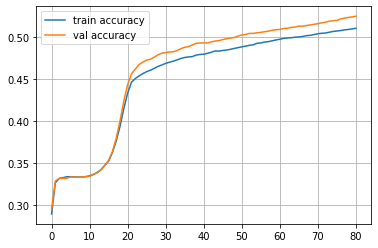

Epoch 81
Train accuracy: 0.5115100316789862
Val accuracy: 0.5247475991135189


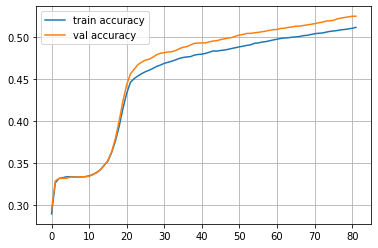

Epoch 82
Train accuracy: 0.5118268215417107
Val accuracy: 0.5247475991135189


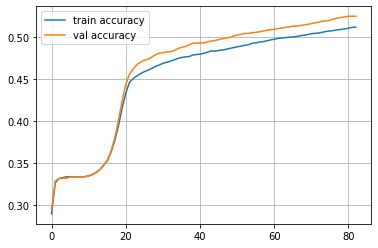

Epoch 83
Train accuracy: 0.5122492080253432
Val accuracy: 0.5257325781827136


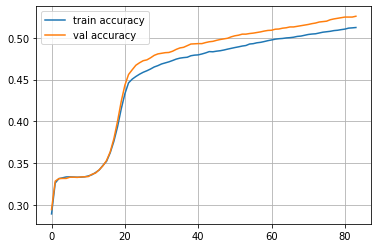

Epoch 84
Train accuracy: 0.512882787750792
Val accuracy: 0.5259788229500123


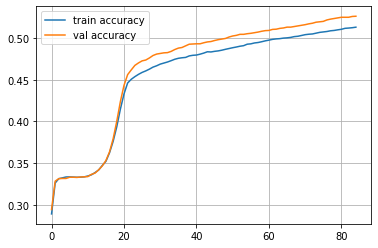

Epoch 85
Train accuracy: 0.5134107708553326
Val accuracy: 0.5267175572519084


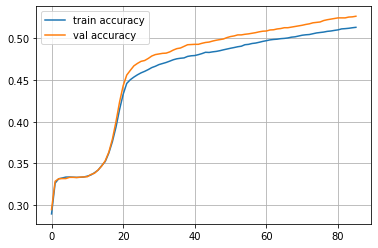

Epoch 86
Train accuracy: 0.5143611404435058
Val accuracy: 0.5277025363211032


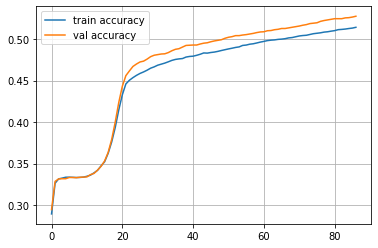

Epoch 87
Train accuracy: 0.5143611404435058
Val accuracy: 0.5281950258557006


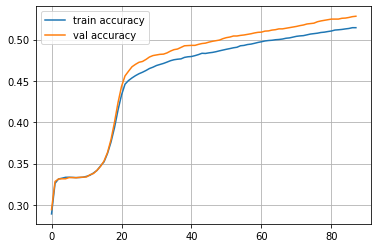

Epoch 88
Train accuracy: 0.515311510031679
Val accuracy: 0.5291800049248954


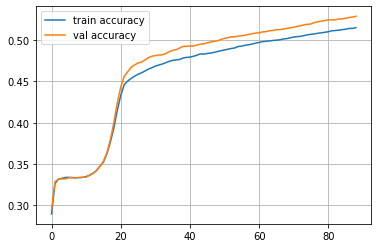

Epoch 89
Train accuracy: 0.5158394931362197
Val accuracy: 0.5296724944594927


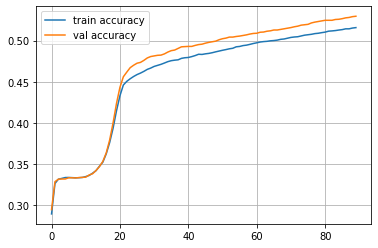

Epoch 90
Train accuracy: 0.5165786694825766
Val accuracy: 0.5311499630632849


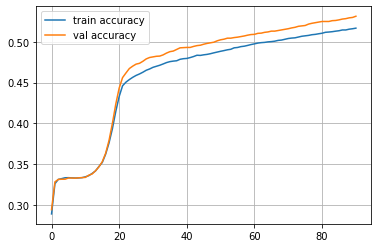

Epoch 91
Train accuracy: 0.517740232312566
Val accuracy: 0.531888697365181


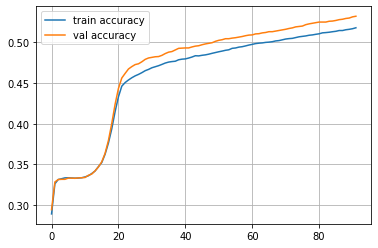

Epoch 92
Train accuracy: 0.5182682154171067
Val accuracy: 0.5321349421324797


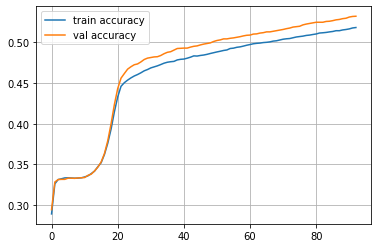

Epoch 93
Train accuracy: 0.5190073917634636
Val accuracy: 0.5328736764343758


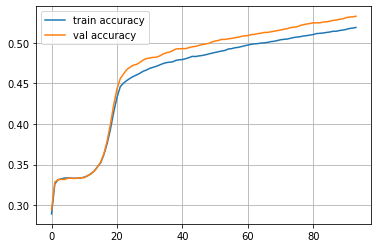

Epoch 94
Train accuracy: 0.5200633579725449
Val accuracy: 0.5343511450381679


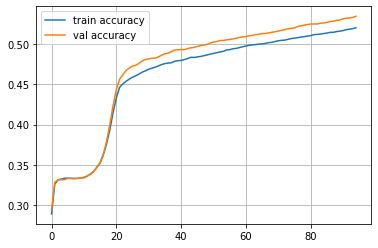

Epoch 95
Train accuracy: 0.5213305174234425
Val accuracy: 0.5355823688746614


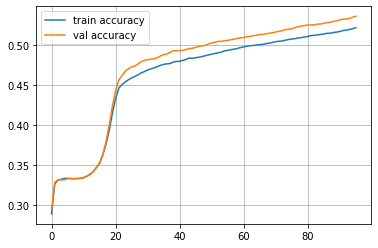

Epoch 96
Train accuracy: 0.5218585005279831
Val accuracy: 0.5370598374784535


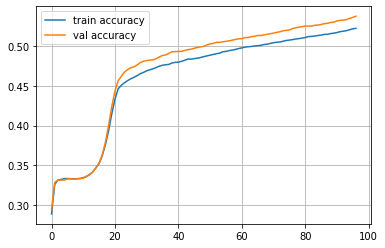

Epoch 97
Train accuracy: 0.5216473072861668
Val accuracy: 0.5382910613149471


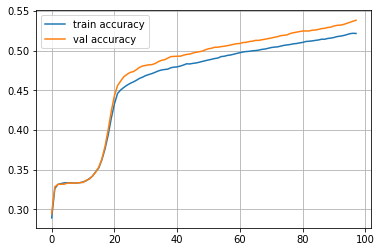

Epoch 98
Train accuracy: 0.52259767687434
Val accuracy: 0.5392760403841418


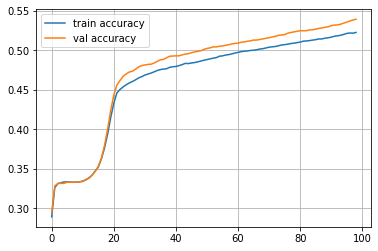

Epoch 99
Train accuracy: 0.5229144667370644
Val accuracy: 0.5409997537552327


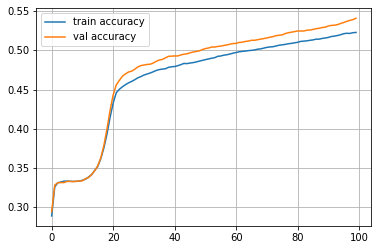

precision: 0.6185030543881748
recall: 0.5429547852260175
f1: 0.4854774586033484
accuracy: 0.5409997537552327
Confusion matrix: 
[[ 772  503   65]
 [  30 1289   33]
 [ 129 1104  136]]
CPU times: user 1min 14s, sys: 15.7 s, total: 1min 30s
Wall time: 1min 13s


In [ ]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(100):
    network.fit(x_train, y_train)   
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])  
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 1000
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20, 3), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7664235126621275
recall: 0.758268003390106
f1: 0.7590008542668065
accuracy: 0.758680128047279
Confusion matrix: 
[[ 922  136  282]
 [  75 1054  223]
 [ 141  123 1105]]
CPU times: user 15.2 s, sys: 55 ms, total: 15.2 s
Wall time: 15.2 s
Compiler : 163 ms


## Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 

### Σχολιασμός
---
<b>Αποτελέσματα</b> :
<br>Στη <u>δική μου υλοποίηση</u> τα αποτελέσματα για μικρότερο αριθμό εποχών (περίπου 25-50) είχαν σχετικά μεγάλη διακύμανση μεταξύ τους καθώς το accuracy κυμαίνεται από 0.5 - 0.6 για 25-100 εποχές, ενώ φτάνει μέχρι το 0.72 για περίπου 1000 εποχές. Αυτό σημαίνει ότι το δίκτυό μας δεν είναι αρκετά συνεπές για μικρό χρόνο εκπαίδευσης και επηρεάζεται αρκετά από τις αρχικές τυχαίες τιμές των βαρών του. Ωστόσο, όσο δοκιμάζουμε να αυξήσουμε τον αριθμό των εποχών, παρατηρούμε ότι η τιμές του accuracy ακολουθούν μία λογαριθμική πορεία, δηλαδή στην αρχή υπάρχει μεγαλύτερο και πιο απότομο correction στις τιμές των βαρών (και το ίδιο και στην απόδοση του δικτύου), ενώ μετά οι επιμέρους διορθώσεις στην απόδοση γίνονται όλο και πιο μικρές και απαιτούνται όλο και περισσότερες εποχές για να βελτιωθεί κατά λιγο η απόδοση του δικτύου. Αυτή η παρατήρηση ωφείλεται στο gradient decent ο οποίος είναι ένας αλγόριθμος που προσπαθεί να βρεί ένα local minimum ξεκινώντας από μία πλαγιά ενός "βουνού".
<br>Για <u>την έτοιμη υλοποίηση</u> τώρα, αυτό που παρατηρούμε είναι ότι τα αποτελέσματα είναι αρκετά πιο συνεπή ακόμα και για μικρό αριθμό εποχών, αλλά και σταθερά καλύτερα, καθώς το αccuracy κυμαίνεται από 0.74-0.75 για 25-100 εποχές, ενώ φτάνει περίπου μέχρι το 0.77 για 1000 εποχές.
<br><br>
<b>Χρόνοι εκτέλεσης</b> :
<br>Στη <u>δική μου υλοποίηση</u> οι χρόνοι που χρειάστηκαν για εκπαιδευτεί το δίκτυο και να μπορεί να κάνει κάποιο πρόβλεψη ήταν περίπου στα 15sec για 25 εποχές (0.6sec/epoch). Επομένως, ο χρόνος γίνεται πολύ μεγαλύτερος εαν θελήσουμε να αυξήσουμε τις εποχές ώστε να έχουμε καλύτερη απόδοση του δικτύου.
<br>Η <u>έτοιμη υλοποίηση</u> είναι σαφώς πιο γρήγορη καθώς μπορεί να εκπαιδεύσει το δίκτυο και να κάνει πολλές προβλέψεις μέσα σε 0.5s για 25 εποχές (0.02sec/epoch). Αυτό μας βοηθά να αυξήσουμε τον αριθμό των εποχών αλλα και των διάφορων συνδυασμών για τα layers δοκιμάζοντας τα αποτελέσματά τους χωρίς τόσο μεγάλο κόστος χρόνου όπως πριν.

# Αξιολόγηση- Συμπεράσματα 

  

Τέλος στο σημείο αυτό καλείστε να αξιολογήσετε τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους εκτέλεσης, και να παραθέσετε παρατηρήσεις καθώς και οτιδήποτε σας φάνηκε ενδιαφέρον ή ιδιαίτερο. 



### Απάντηση/Σχολιασμός
---
Ο παρακάτω πίνακας αφορά σε μετρήσεις για τις δικές μου υλοποιήσεις :

|  | KNN | NB | MLP |
|---|:---:|:---:|:---:|
| Accuracy | 0.62 - 0.75 | 0.67 - 0.74 | 0.5 - 0.72 |
| Time <br>Efficiency | 15s (eucl),<br>35s (cos) | 330ms | 0.6s/epoch |
| Mean <br>Accuracy | 0.7 | 0.7 | 0.6 |
| Accuracy<br>Deviation | 0.05 | 0.03 | 0.1 |

Αρχικές παρατηρήσεις
<br>
1. Τα δεδομένα για το train set ηταν τα ίδια για όλους τους ταξινομητές (70% πρώτα τραγούδια από κάθε κατηγορία).
2. Τα δεδομένα του test set γίνονταν shuffle κάθε φορά ώστε οι μετρήσεις να είναι πιο ποιοτικές.

#### ⏲ <b>Σχολιασμός χρόνου</b> 
Το μέγεθος στο οποίο υπήρχε αρκετά μεγάλη σχετική διαφοροποίηση μεταξύ των 3 υλοποιήσεων, αλλά και μεταξύ των δικών μου μοντέλων και των έτοιμων ήταν ο χρόνος. 
<br>Το πιο χρονοβόρο μοντέλο φαίνεται να είναι αυτό του KNN, καθώς το κάθε διάνυσμα εισόδου συγκρίνεται με όλα τα διανύσματα εκπαίδευσης (ο αριμός Κ είδαμε ότι δεν επηρεάζει το χρόνο εκτέλεσης στη συγκεκριμένη υλοποίηση). Δεύτερο σε κόστος χρόνου αν συμπεριλάβουμε και την εκπαίδευση μπορούμε να θεωρήσουμε το MLP το οποίο προκειμένου να δώσει ικανοποιητικές προβλέψεις χρειάζεται σχετικά μεγάλος χρόνος εκπαίδευσης. Αυτό φυσικά δεν ισχύει στη περίπτωση του έτοιμου ταξινομητή, ο οποίος ήταν αρκετά πιο γρήγορος. Επίσης, ένας τέτοιος ταξινομητής μπορεί να έχει μεγάλο χρόνο εκτέλεσης, αλλά για μεμονομένη είσοδος στο μέλλον η χρονική απόδοσή του είναι πολύ καλή. Ένας τέτοιος ταξινομητής θα ήταν καλός αν θέλαμε συνεπής και γρήγορες προβλέψεις δεδομένου ότι τον αφήναμε να εκπαιδευτεί για πολύ χρόνο. Τέλος, ο ταξινομητής NB για τα συγκεκριμένα δεδομένα εισόδου και πρόβλεψης φάνηκε να είναι αρκετά γρήγορος και χωρίς μεγάλη διαφορά μεταξύ της έτοιμης υλοποίησης και της δικής μου. Στα νούμερα, υπολόγισε τις επιμέρους πιθανότητες για 9000 δεδομένα εκπαίδευσης και ταξινόμησε άλλες 4000 δεδμένα σε κάτω από 1 δευτερόλεπτο, χωρίς κόστος στην ακρίβεια. Ένας τέτοιος ταξινομητής θα ήταν καλός αν έπρεπε να εκπαιδεύσουμε γρήγορα το μοντέλο και να κανουμε και προβλέψεις.

#### 📈 <b>Σχολιασμός απόδοσης</b> 
Αρχικά, μπορούμε να διακρίνουμε ότι η απόδοση (accuracy) και των 3 μοντέλων κυμαίνεται γύρω στο 0.7 - 0.75 στις καλές περιπτώσεις, είτε πρόκειται για τις έτοιμες υλοποιήσεις είτε για τις δικές μου. Μία παραδοχή που μπορούμε να κάνουμε είναι ότι αυτή η απόδοση ωφείλεται στη ποιότητα των δεδομένων αλλά και στη ποσότητα των χαρακτηριστικών τα οποία λάβαμε υπόψην μας. Αν εκπαιδεύουμε επαρκώς και τα 3 μοντέλα, δεν υπάρχει κάποιο που να ξεχωρίζει με διαφορά περισσότερο από τα υπόλοιπα όσον αφορά το βέλτιστο accuracy. Επομένως, αυτό που μπορούμε να συγκρίνουμε είναι η συνέπεια και η διασπορά του accuracy. Το πιο αξιόπιστο μοντέλο είναι αυτό του MLP, το οποίο αν το τρέξουμε για πολλές εποχές (πχ. 1000) μπορεί να διατηρήσει το ποσοστό προβλέψεων στο 0.72 (ή στο 0.76 για το έτοιμο μοντέλο) για διάφορα διανύσματα εισόδου. Άρα, σαν λύση φαίνεται να είναι αρκετά αξιόπιστη και συνεπής. Αμέσως μετά, το μοντέλο του NB είχε και αυτό αρκετά υψηλή απόδοση με την υλοποίηση του euclidean και του cosine να κυμαίνονται γύρω στο 0.74 και τις περισσότερες φορές να ξεπερνάνε την απόδοση του έτοιμου ταξινομητή. Σαν λύση είχε και σχετικά μικρή διασπορά καθώς η μέση τιμή του accuracy για διάφορες εισόδους ήταν γύρω στο 0.7 με τις χειρότερες αποδόσεις να μην διαφέρουν κατά πολύ (γύρω στο 0.03). Επομένως, με πρακτικά δεδομένα είναι μία λύση που μπορεί να έχει αρκετά καλή απόδοση, χωρίς κιόλας να απαιτεί πολλή εκπαίδευση. Τέλος, το μοντέλο του ταξινομητή KNN, είχε και αυτό σχετικά μεγάλη μέση τιμή accuracy (γύρω στο 0.7 και αυτό). Ωστώσο, ήταν μία υλοποίηση στην οποία παρατηρήθηκε κάπως μεγαλύτερη διακύμανση στην τιμή της απόδοσης, το οποίο σημαίνει ότι δεν θα μας δίνει το ίδιο συχνά αξιόπιστες προβλέψεις (όσο για παράδειγμα το MLP μοντέλο).

---
### Πότε θα επέλεγα το κάθε μοντέλο ❓
1. <b>ΚΝΝ - Κ Nearest Neighbor</b><br>
Σαν μοντέλο ίσως είναι αργό για μεγάλο όγκο training δεδομένων. Επομένως, θα το χρησιμοποιούσα αν είχα ένα σχετικά μικρό training set (όπως τώρα), αλλά και στη περίπτωση όπου τα δεδομένα μου θα ήταν καλά διαχωρισμένα στο διανυσματικό χώρο (πιθανώς να πέρναγαν πρώτα από κάποια mapping συνάρτηση φ(x)).

2. <b>NB - Naive Bayes</b><br>
Είναι ένας αρκετά γρήγορος αλγόριθμος όταν έχω μεγάλο όγκο δεδομένων στο training set και σχετικά μικρό διάνυσμα x για είσοδο. Επομένως, θα το χρησιμοποιούσα σε μία περίπτωση που έχω ένα αρκετά μεγάλο training set με ποιοτικά δεδομένα, αλλά και σε κάποια περίπτωση που θέλω να κάνω γρήγορα κάποια εκτίμηση.

3. <b>MLP - Multi-Layer Perceptron</b><br>
Το συγκεκριμένο μοντέλο έχει αρκετά καλή και συνεπή απόδοση, με μοναδικό προαπαιτούμενο την εκπαίδευση του δικτύου η οποία μπορεί να πάρει κάποιο χρόνο. Είναι η υλοποίηση η οποία φαίνεται να έχει τη μεγαλύτερη ευελιξία όσον αφορά το classification λόγω των πολλών επιπέδων και πολλών perceptrons που μπορούν να χρησιμοποιηθούν για την πρόβλεψη, αλλά ακόμη, δίνει αν έχει εκπαιδευτεί με ποιοτικά δεδομένα είναι το μοντέλο που έχει τη πιο συνεπή απόδοση. Επομένως, θα το επέλεγα σε μία περίπτωση όπου είχα ένα μεγάλο όγκο δεδομένων για το training set καθώς και αρκετούς πόρους για να το εκπαιδεύσω (θεωρώ ότι οι επιμέρους χρόνοι πρόβλεψης είναι τουλάχιστον το ίδιο καλοί με τα άλλα δύο μοντέλα)

